# Projektarbeit Business Analytics

Gruppe 4, Timo Gerstenhauer 86164 und Kilian Mütz 79561

## Support Vector Machine Classification

### Kontext

- Datensatz zu Hotelbuchungen 
- Fokus auf das Untersuchungsobjekt "H1", ein Resort-Hotel an der Algravenküste Portugals

### Datensatz 

- H1.csv
- Umfasst den Zeitraum vom 01.07.2015 bis zum 31.08.2017
- Es existieren 31 Variablen mit ~40.000 Beobachtungen

#### Explorative

In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold




In [4]:
#load data
df = pd.read_csv("H1.csv")

In [5]:
print(df.shape)

(40060, 31)


In [6]:
print(df.head())

   IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0       342             2015             July   
1           0       737             2015             July   
2           0         7             2015             July   
3           0        13             2015             July   
4           0        14             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     0   
4                     27                      1                     0   

   StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
0                  0       2         0  ...  No Deposit              NULL   
1                  0       2         0  

In [7]:
print(df.dtypes)

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                         int64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

In [8]:
df.corr(numeric_only=True)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
IsCanceled,1.000000,0.229444,0.043624,0.021601,-0.009386,0.078569,0.078477,0.080546,0.081234,-0.023254,-0.103563,0.114173,-0.076767,-0.114835,-0.036301,0.109317,-0.243863,-0.101295
LeadTime,0.229444,1.000000,0.059249,0.121448,-0.024389,0.325712,0.387608,0.136744,0.000640,0.001256,-0.150050,0.093954,-0.108303,0.075317,0.089244,0.030482,-0.151192,-0.007828
ArrivalDateYear,0.043624,0.059249,1.000000,-0.537146,0.005032,0.019798,0.013447,-0.021593,0.057828,-0.016450,0.072335,-0.103922,0.059135,0.036056,-0.038280,0.127791,-0.011293,0.063893
ArrivalDateWeekNumber,0.021601,0.121448,-0.537146,1.000000,0.076378,0.047982,0.045228,0.052741,0.016374,0.017458,-0.078302,0.043196,-0.051522,0.010635,0.062436,0.157066,0.007667,0.045231
ArrivalDateDayOfMonth,-0.009386,-0.024389,0.005032,0.076378,1.000000,-0.043260,-0.051855,-0.001964,0.017279,-0.001238,0.002194,-0.043768,0.004745,0.004723,0.032953,0.040700,0.013719,0.011683
StaysInWeekendNights,0.078569,0.325712,0.019798,0.047982,-0.043260,1.000000,0.716889,0.101000,0.039252,0.015036,-0.119593,-0.006361,-0.097778,0.057392,-0.008488,0.103604,-0.091199,0.062372
StaysInWeekNights,0.078477,0.387608,0.013447,0.045228,-0.051855,0.716889,1.000000,0.097018,0.033680,0.014429,-0.130398,-0.006203,-0.090851,0.085822,0.029519,0.119572,-0.103011,0.058476
Adults,0.080546,0.136744,-0.021593,0.052741,-0.001964,0.101000,0.097018,1.000000,0.073246,0.023165,-0.125123,0.006338,-0.133045,-0.010911,-0.011558,0.202422,0.013443,0.079015
Children,0.081234,0.000640,0.057828,0.016374,0.017279,0.039252,0.033680,0.073246,1.000000,0.020415,-0.043235,-0.020091,-0.036431,0.044494,-0.020528,0.355781,0.046689,0.028458
Babies,-0.023254,0.001256,-0.016450,0.017458,-0.001238,0.015036,0.014429,0.023165,0.020415,1.000000,-0.021107,-0.008588,-0.016870,0.098054,-0.007511,0.053371,0.035319,0.130617


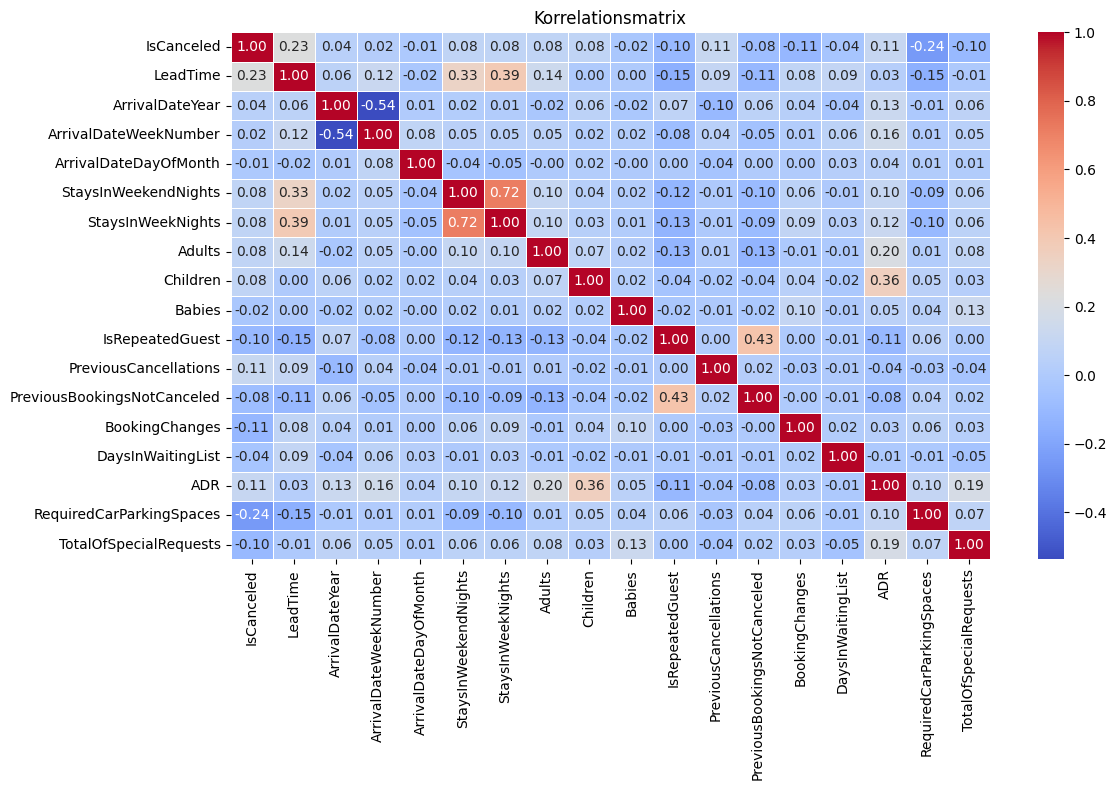

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Korrelationsmatrix")
plt.tight_layout()
plt.show()

### Vorverarbeitung

Ziel ist die Klassifikation ob eine Hotelbuchung storniert wird, mit Zielvariable: "Is Canceled"

In [10]:
y = df["IsCanceled"]

In [11]:
#drop useless columns
X = df.drop(columns=[
    "IsCanceled", "ReservationStatus", "ReservationStatusDate",
    "Company", "Agent", "AssignedRoomType", "ReservedRoomType"
])

In [12]:
#one-hot-encoding for categorical features
X = pd.get_dummies(X, drop_first=True)

In [13]:
#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
#train test split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model

In [15]:
#cross validation hyperparameters
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

In [16]:
#model initalization
svc = SVC(probability=True)

In [17]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [18]:
#grid search setup
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring='roc_auc',  # Alternativ: 'accuracy', 'f1'
    cv=cv,
    n_jobs=-1,  # parallele Berechnung
    verbose=2
)

In [19]:
#training with cross validation
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=15.7min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=15.8min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=15.9min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=16.0min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=16.0min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=16.2min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=16.2min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=18.5min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=18.5min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=18.6min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=18.6min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=18.6min
[CV] END ...................

,estimator,SVC(probability=True)
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 0.01, ...], 'kernel': ['rbf']}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [20]:
#best parameters and performance
print("Beste Parameter:", grid_search.best_params_)
print("Bester ROC-AUC Score (CV):", grid_search.best_score_)

Beste Parameter: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Bester ROC-AUC Score (CV): 0.9306982226222352


In [21]:
#prediciton with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

### Evaluation

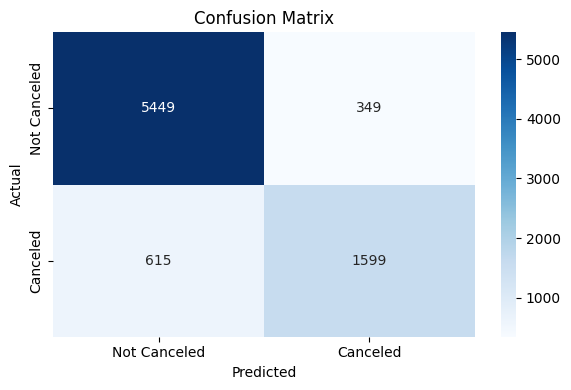

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8796804792810784
ROC AUC Score: 0.9404406730913348

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      5798
           1       0.82      0.72      0.77      2214

    accuracy                           0.88      8012
   macro avg       0.86      0.83      0.84      8012
weighted avg       0.88      0.88      0.88      8012

